In [54]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import copy
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np
cats = {
    "EDIP-Gold": "Gold [mg]",
    "EDIP-Copper": "Copper [mg]",
    "CED - total": "Primary Energy [GJ-eq]",
    "CExD - metals": "CExD",
    "ADP": "Depletion of Minerals",
    "EI-Minerals- Total": "Economic Importance\n[kg Sb-eq]",
    "SR-Minerals- Total": "Supply Risk",
    "GPR-Minerals- Total": "Geo-Politic\nSupply Risk [1E8]",
    "CML-climate change (GWP 100a)": "Green House Emissions",
    "ReCiPe Midpoint (E) - metal depletion (MDP)": "MDP",
    "ReCiPe Endpoint (E - A) - total (total)": "Total"}

cats_symbol = {
    "EDIP-Gold": "Au",
    "EDIP-Copper": "Cu",
    "CED - total": "CED",
    "CExD - metals": "CExD",
    "ADP": "ADP",
    "EI-Minerals- Total": "EI",
    "SR-Minerals- Total": "SR",
    "GPR-Minerals- Total": "GPSR",
    "CML-climate change (GWP 100a)": "GWP",
    "ReCiPe Midpoint (E) - metal depletion (MDP)": "MDP",
    "ReCiPe Endpoint (E - A) - total (total)": "Total"}

FONTSIZE = 8
sns.set(context="paper", palette="colorblind",
            style="darkgrid", font_scale=1, font="Times New Roman")

ps_list = [
    "3204-CPU, mounted mainboard",
    "3208-Mainboard",
    "3211-PCB mounted mainboard",
    "3219-PCB, for power supply unit",
    "4440-Server, 1U, no storage",
    "4443-Server, 2U, storage",
    "4455-Blade (Ref. Unit)",
    "5101-KDO-IT",
    #"5201-KDO-Climatization",
    #"5301-KDO-Energy Supply",
    #"5401-KDO-Infrastructure",
    "6001-KDO",
    "6003-RZ1"
]


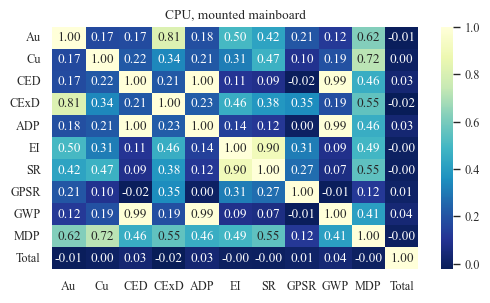

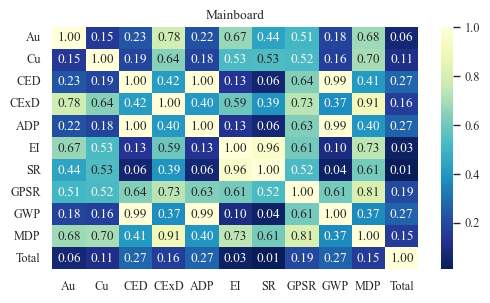

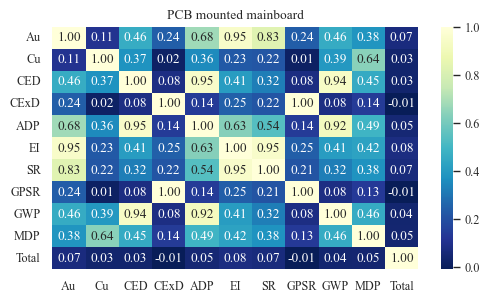

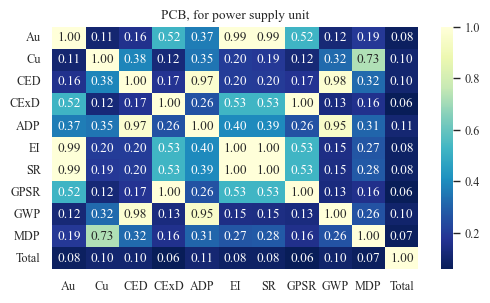

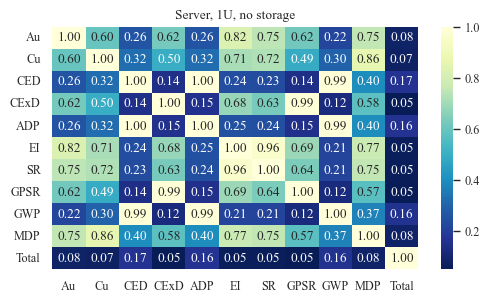

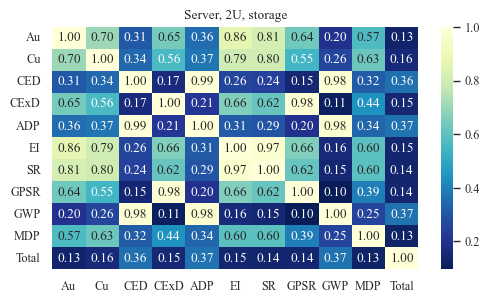

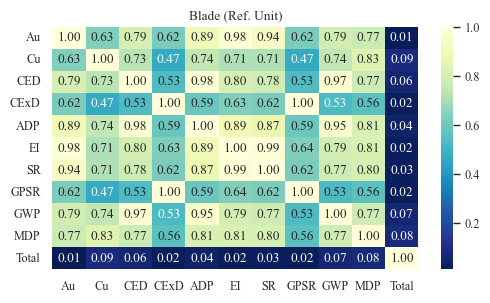

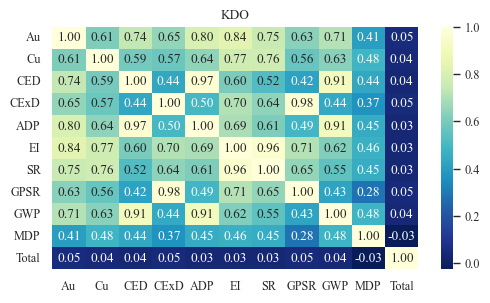

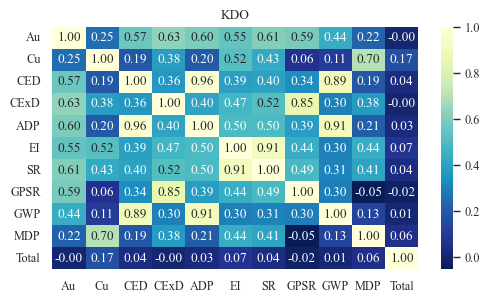

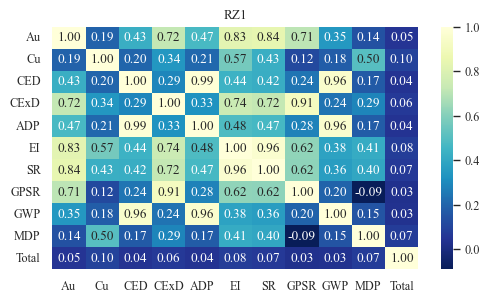

In [55]:


def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes,
                fontsize=FONTSIZE, font="Times New Roman")


for ps_name in ps_list:
    corr = "data/MC_TEMPRO_DB220425_{}_{}.csv".format("Corr", ps_name)
    df = pd.read_csv(corr)
    df = df[list(cats.keys())]
    df.rename(columns=cats_symbol, inplace=True)

    for c in list(df.columns):
        df = df[df[c] > 0]

    
    cm = 1/2.54    
    

    fig, ax = plt.subplots(figsize=(15*cm, 8*cm))
    ax.set_title(ps_name.split("-")[1])
    df_corr = df.corr()
    sns.heatmap(data=df_corr, cmap="YlGnBu_r", annot=True, fmt=".2f", ax=ax)
    fig.savefig("heatmap.svg", bbox_inches='tight', dpi=600)

In [56]:
for ps_name in ps_list:
    corr = "data/MC_TEMPRO_DB220425_{}_{}.csv".format("Corr", ps_name)
    df = pd.read_csv(corr)
    df = df[list(cats.keys())]
    df.rename(columns=cats_symbol, inplace=True)

    for c in list(df.columns):
        df = df[df[c] > 0]

    cm = 1/2.54    
    

    df.dropna(inplace=True)

    for c in list(df.columns):
        df[c] = df[c].apply(lambda x: np.log(x))

    df_corr = df.corr()

    for c in df_corr.columns:
        for c_j in df_corr.columns:
            if c != c_j:
                r, _ = pearsonr(df[c], df[c_j])
                df_corr.at[c,c_j] =   abs(r)


    fig, ax = plt.subplots(figsize=(15*cm, 8*cm))
    name = ps_name.split("-")[1]
    if "KDO" in name:
        name = "Medium DC"
    ax.set_title(name)
    sns.heatmap(data=df_corr, cmap="YlGnBu_r", annot=True, fmt=".2f", ax=ax, vmin = 0, annot_kws={"fontsize":FONTSIZE*0.85})
    fig.savefig(f"HeatMapPearson/{name}_heatmap.png", bbox_inches='tight', dpi=600)
    plt.close()
